In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
        
# EDA :
# Correlation Matrix
# Scatter plot of results vs other columns, event vs other columns, and Termination vs other other columns, 
# Box plot for outliers
# Histogram for Black and White ELO


# Preprocessing
# Encode Result in 3 categories
# Categorize and encode Events and or type of games in less categories
# Scale White ELO and Black ELO
# Create a different Data frame with Opening and ECO useful later for mapping
# Reduce Instance on basis of Termination condition as Abandoned and Rule Infarction and encode other Terminations: normal and time forfeit. 
        


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Dataset

In [2]:
chess_data_df = pd.read_csv("chess_games.csv")
print(chess_data_df.head())

                Event            White       Black Result     UTCDate  \
0          Classical           eisaaaa    HAMID449    1-0  2016.06.30   
1              Blitz            go4jas  Sergei1973    0-1  2016.06.30   
2   Blitz tournament   Evangelistaizac      kafune    1-0  2016.06.30   
3     Correspondence            Jvayne    Wsjvayne    1-0  2016.06.30   
4   Blitz tournament            kyoday   BrettDale    0-1  2016.06.30   

    UTCTime  WhiteElo  BlackElo  WhiteRatingDiff  BlackRatingDiff  ECO  \
0  22:00:01      1901      1896             11.0            -11.0  D10   
1  22:00:01      1641      1627            -11.0             12.0  C20   
2  22:00:02      1647      1688             13.0            -13.0  B01   
3  22:00:02      1706      1317             27.0            -25.0  A00   
4  22:00:02      1945      1900            -14.0             13.0  B90   

                                         Opening TimeControl   Termination  \
0                                   Sl

# Correlation Matrix

/var/folders/31/nx23nfg962bdp5zbl9b212140000gn/T/ipykernel_9232/1141021421.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = chess_data_df.corr()


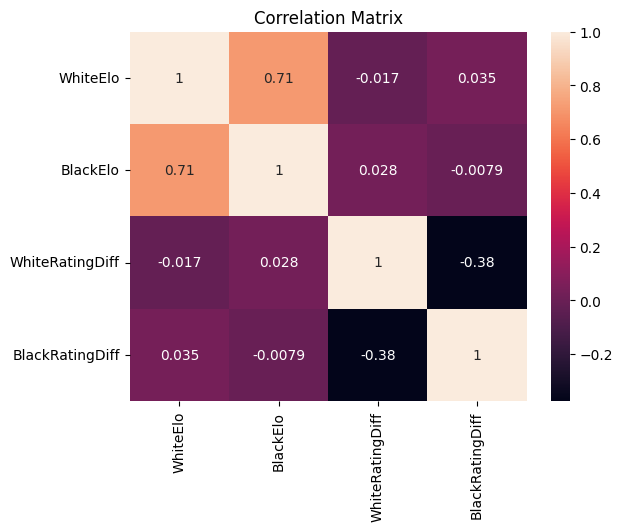

In [3]:
# calculate correlation matrix
corr_matrix = chess_data_df.corr()

# plot correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

In [4]:
# According to the correlation Matrix columns 'WhiteRatingDiff' and  'BlackRatingDiff' 
# have least correlation and the values just the meant the what difference in rank affects the game
# If wins difference is positive or else difference is negative

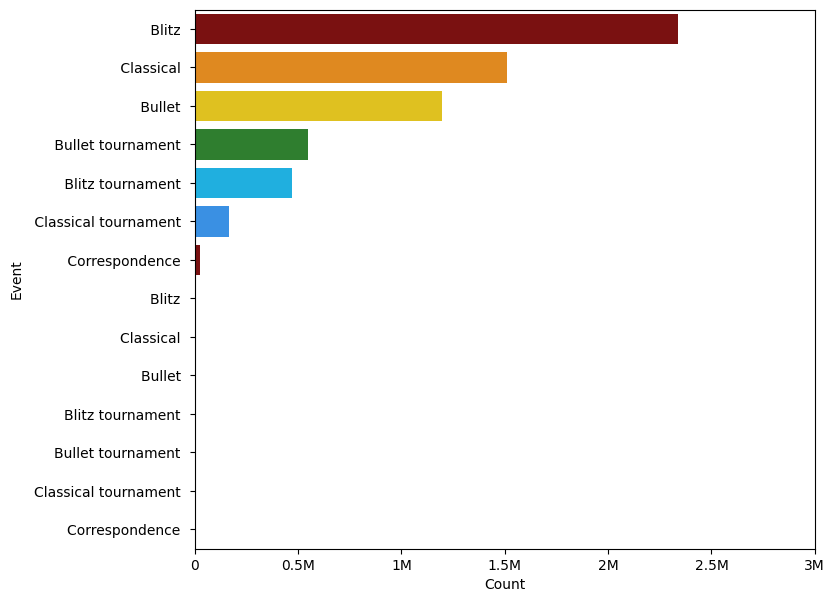

In [5]:
plt.figure(figsize=(8, 7))
custom_palette = ["#8B0000", "#FF8C00", "#FFD700", "#228B22", "#00BFFF", "#1E90FF"]
sns.countplot(y='Event', data=chess_data_df, palette=custom_palette, order=chess_data_df['Event'].value_counts().index)

# set x-axis label and scale
plt.xlabel('Count')
plt.ticklabel_format(axis='x', style='plain', useOffset=False)

# set x-axis limits and tick values
plt.xlim(0, 3000000)
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000,3000000], 
           ['0', '0.5M', '1M', '1.5M', '2M', '2.5M','3M'])

# display plot
plt.show()

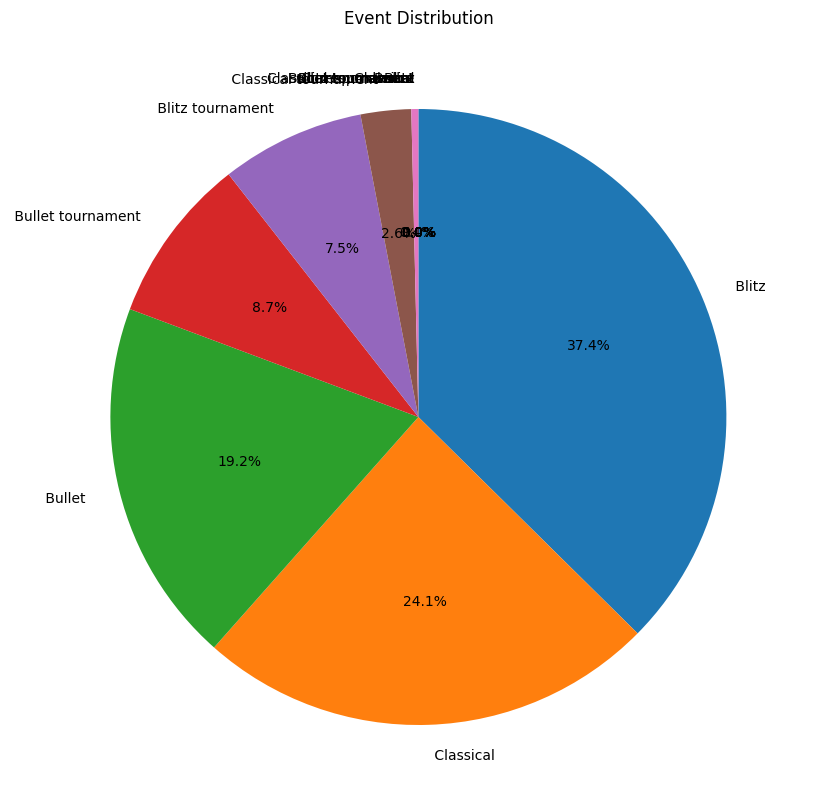

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# create a new dataframe with count of each event
event_counts = chess_data_df['Event'].value_counts().reset_index()
event_counts.columns = ['Event', 'Count']

# create a pie chart
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(event_counts['Count'], labels=event_counts['Event'], autopct='%1.1f%%', startangle=90, counterclock=False)
ax.set_title('Event Distribution')
plt.show()


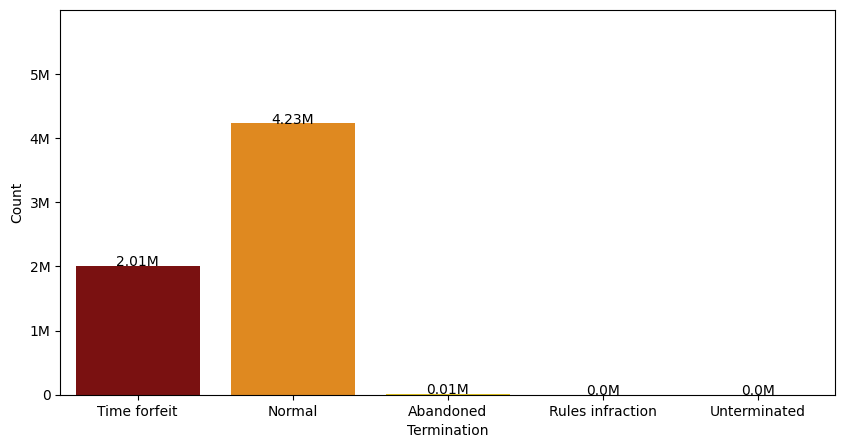

In [7]:
plt.figure(figsize=(10, 5))
custom_palette = ["#8B0000", "#FF8C00", "#FFD700", "#228B22", "#00BFFF", "#1E90FF"]
ax = sns.countplot(x='Termination', data=chess_data_df, palette=custom_palette)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, str(round(height/1000000,2))+'M', ha='center')
# set y-axis label and scale
# set y-axis label and scale
plt.ylabel('Count')
plt.ticklabel_format(axis='y', style='plain', useOffset=False)

# set y-axis limits and tick values
plt.ylim(0, 6000000)
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], 
           ['0', '1M', '2M', '3M', '4M', '5M'])
plt.show()

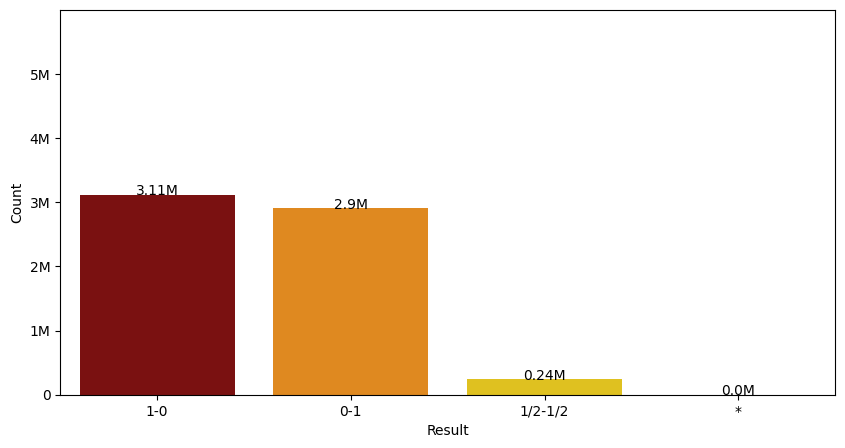

In [8]:
plt.figure(figsize=(10, 5))
custom_palette = ["#8B0000", "#FF8C00", "#FFD700", "#228B22", "#00BFFF", "#1E90FF"]
ax = sns.countplot(x='Result', data=chess_data_df, palette=custom_palette)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, str(round(height/1000000,2))+'M', ha='center')
# set y-axis label and scale
# set y-axis label and scale
plt.ylabel('Count')
plt.ticklabel_format(axis='y', style='plain', useOffset=False)

# set y-axis limits and tick values
plt.ylim(0, 6000000)
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], 
           ['0', '1M', '2M', '3M', '4M', '5M'])
plt.show()

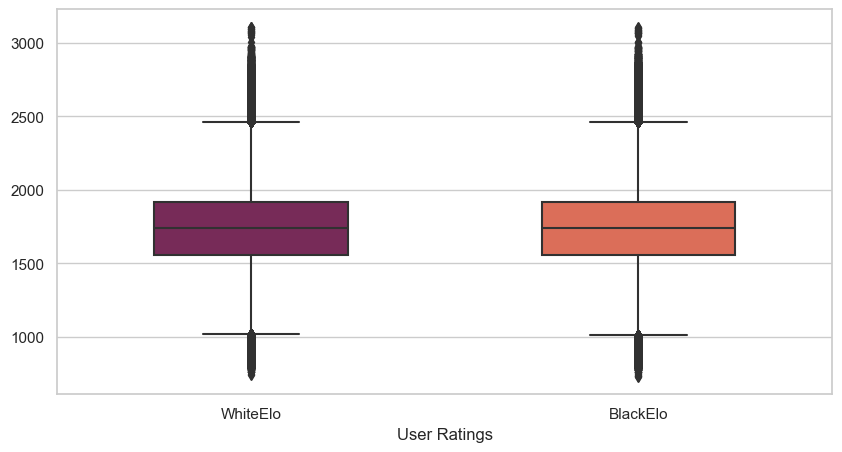

In [9]:
# Set up the figure size and style
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

# Create a list of the two columns to plot
data = [chess_data_df['WhiteElo'], chess_data_df['BlackElo']]

# Create the box plot
bp = sns.boxplot(data=data, palette='rocket', showfliers=True, width=0.5)
bp.set(xlabel='User Ratings', xticklabels=['WhiteElo', 'BlackElo'])

# Show the plot
plt.show()

/var/folders/31/nx23nfg962bdp5zbl9b212140000gn/T/ipykernel_9232/539053141.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(chess_data_df['WhiteElo'],palette='rocket')


<AxesSubplot: xlabel='WhiteElo', ylabel='Count'>

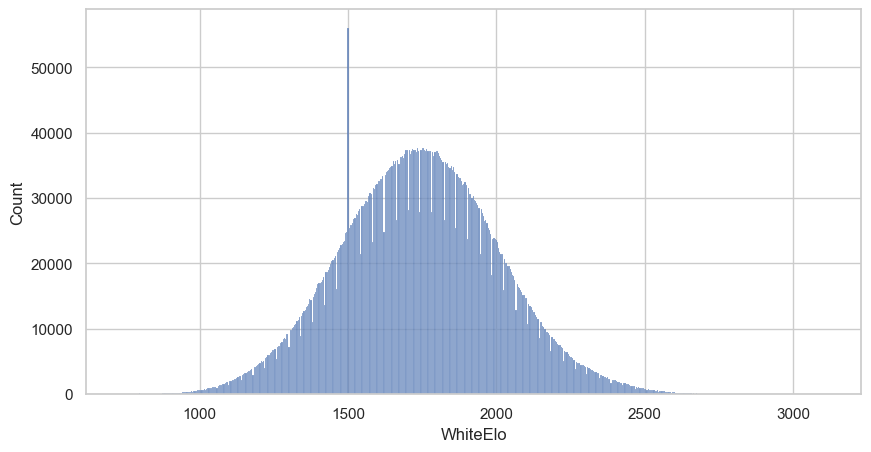

In [10]:
sns.histplot(chess_data_df['WhiteElo'],palette='rocket')

<AxesSubplot: xlabel='BlackElo', ylabel='Count'>

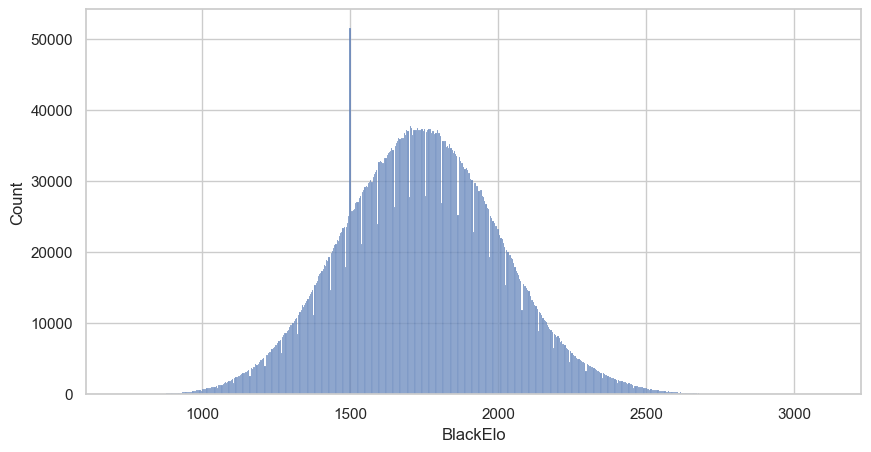

In [11]:
sns.histplot(chess_data_df['BlackElo'])

# Preprocessing

In [12]:
new_chess_data_df = chess_data_df

In [13]:
# Row-wise missing value analysis
missing_values_row = new_chess_data_df.isnull().sum(axis=1)
print("Number of rows with missing values:", len(missing_values_row[missing_values_row > 0]))
print("Percentage of rows with missing values:", round(len(missing_values_row[missing_values_row > 0]) / len(chess_data_df) * 100, 2), "%")

# Column-wise missing value analysis
missing_values_column = new_chess_data_df.isnull().sum()
print("Number of columns with missing values:", len(missing_values_column[missing_values_column > 0]))
print("Percentage of columns with missing values:", round(len(missing_values_column[missing_values_column > 0]) / len(chess_data_df.columns) * 100, 2), "%")

# Overall missing value analysis
total_missing_values = new_chess_data_df.isnull().sum().sum()
print("Total number of missing values:", total_missing_values)
print("Percentage of missing values:", round(total_missing_values / (len(chess_data_df) * len(chess_data_df.columns)) * 100, 2), "%")

Number of rows with missing values: 4668
Percentage of rows with missing values: 0.07 %
Number of columns with missing values: 2
Percentage of columns with missing values: 13.33 %
Total number of missing values: 9336
Percentage of missing values: 0.01 %


In [14]:
# Drop all rows with NaNs
new_chess_data_df.dropna(inplace=True)
# Print the shape of the cleaned dataframe
print("Shape of dataframe after dropping NaNs:", new_chess_data_df.shape)

Shape of dataframe after dropping NaNs: (6251516, 15)


In [15]:
# Drop the columns
new_chess_data_df.drop(['White', 'Black', 'UTCDate', 'UTCTime', 'WhiteRatingDiff', 'BlackRatingDiff', 'TimeControl'], axis=1, inplace=True)
# Print the updated dataframe
# print(chess_data_df.head())
print(new_chess_data_df.shape)
# filter the rows based on the condition
new_chess_data_df = new_chess_data_df[(new_chess_data_df['AN'].str.len() >= 40) & (~new_chess_data_df['AN'].str.contains('{'))]
# reset the index after dropping the rows
new_chess_data_df.reset_index(drop=True, inplace=True)
print(new_chess_data_df.shape)

(6251516, 8)
(5389167, 8)


In [92]:
print(new_chess_data_df.columns)

Index(['Event', 'Result', 'WhiteElo', 'BlackElo', 'ECO', 'Opening',
       'Termination', 'AN'],
      dtype='object')


In [16]:
an_val = new_chess_data_df['AN']
# initialize dataframe with empty values
#print(an_val[0])
# loop through each game and extract the first 3 moves
dflist = []
for i, game in enumerate(an_val):
    itr = 0
    temp = []
    flag = 1
    tstr = ''
    if(len(game)<40 or '{' in game):
        continue
    #print(len(game), game)
    while(flag and itr<len(game)):
        if game[itr] == " ":
            temp.append(tstr)
            tstr = ''
        else:
            tstr += game[itr]
        itr+=1
        if(itr+1<len(game)):
            if(game[itr]=='4' and game[itr+1]=='.'):
                flag = 0
    #print(temp)
    temp1 = []
    for i in range(0,len(temp)):
        if i!=0 and i!=3 and i!=6:
            temp1.append(temp[i])
    dflist.append(temp1)
df = pd.DataFrame(dflist, columns=['w1', 'b1', 'w2', 'b2', 'w3', 'b3'])
print(df)

          w1   b1    w2    b2    w3    b3
0         d4   d5    c4    c6    e3    a6
1         e4   e5    b3   Nf6   Bb2   Nc6
2         e4   d5  exd5  Qxd5   Nf3   Bg4
3         e3  Nf6   Bc4    d6    e4    e6
4         e4   c5   Nf3    d6    d4  cxd4
...      ...  ...   ...   ...   ...   ...
5389162   e4   e5   Qf3   Nc6   Bc4   Nf6
5389163   e4   c5   Nf3    d6    d4  Qa5+
5389164   e4   e5   Nf3    h6   Nc3    d6
5389165  Nf3   d5    c4  dxc4  Qa4+    c6
5389166   e4   e6    d4    d6   Nc3    c6

[5389167 rows x 6 columns]


In [17]:
# merge the two dataframes on their indices
merged_df = pd.merge(new_chess_data_df, df, left_index=True, right_index=True)
print(merged_df)

                      Event Result  WhiteElo  BlackElo  ECO  \
0                Classical     1-0      1901      1896  D10   
1                    Blitz     0-1      1641      1627  C20   
2         Blitz tournament     1-0      1647      1688  B01   
3           Correspondence     1-0      1706      1317  A00   
4         Blitz tournament     0-1      1945      1900  B90   
...                     ...    ...       ...       ...  ...   
5389162              Blitz     0-1      1491      1509  C20   
5389163              Blitz     1-0      1248      1303  B54   
5389164          Classical     1-0      1328      1292  C40   
5389165             Bullet     0-1      1726      1776  A09   
5389166          Classical     0-1      1948      1992  C00   

                                               Opening   Termination  \
0                                         Slav Defense  Time forfeit   
1                            King's Pawn Opening: 2.b3        Normal   
2        Scandinavian Defen

In [18]:
new_df = merged_df
new_df.drop(['Event', 'AN', 'Opening', 'Termination', 'ECO'], axis=1, inplace=True)
new_df

,Result,WhiteElo,BlackElo,w1,b1,w2,b2,w3,b3
0,1-0,1901,1896,d4,d5,c4,c6,e3,a6
1,0-1,1641,1627,e4,e5,b3,Nf6,Bb2,Nc6
2,1-0,1647,1688,e4,d5,exd5,Qxd5,Nf3,Bg4
3,1-0,1706,1317,e3,Nf6,Bc4,d6,e4,e6
4,0-1,1945,1900,e4,c5,Nf3,d6,d4,cxd4
...,...,...,...,...,...,...,...,...,...
5389162,0-1,1491,1509,e4,e5,Qf3,Nc6,Bc4,Nf6
5389163,1-0,1248,1303,e4,c5,Nf3,d6,d4,Qa5+
5389164,1-0,1328,1292,e4,e5,Nf3,h6,Nc3,d6
5389165,0-1,1726,1776,Nf3,d5,c4,dxc4,Qa4+,c6


In [19]:
# create a mapping dictionary to replace the values
mapping_dict = {'1-0': 1, '0-1': 0, '1/2-1/2': 2}

# replace the values in the 'Result' column using the mapping dictionary
new_df['Result'] = new_df['Result'].replace(mapping_dict)
new_df

,Result,WhiteElo,BlackElo,w1,b1,w2,b2,w3,b3
0,1,1901,1896,d4,d5,c4,c6,e3,a6
1,0,1641,1627,e4,e5,b3,Nf6,Bb2,Nc6
2,1,1647,1688,e4,d5,exd5,Qxd5,Nf3,Bg4
3,1,1706,1317,e3,Nf6,Bc4,d6,e4,e6
4,0,1945,1900,e4,c5,Nf3,d6,d4,cxd4
...,...,...,...,...,...,...,...,...,...
5389162,0,1491,1509,e4,e5,Qf3,Nc6,Bc4,Nf6
5389163,1,1248,1303,e4,c5,Nf3,d6,d4,Qa5+
5389164,1,1328,1292,e4,e5,Nf3,h6,Nc3,d6
5389165,0,1726,1776,Nf3,d5,c4,dxc4,Qa4+,c6


In [20]:
new_df['Result'].unique()

array([1, 0, 2, '*'], dtype=object)

In [21]:
new_df = new_df.loc[new_df['Result'] != 2]
new_df = new_df.loc[new_df['Result'] != '*']
print(new_df)
new_df['Result'].unique()

        Result  WhiteElo  BlackElo   w1   b1    w2    b2    w3    b3
0            1      1901      1896   d4   d5    c4    c6    e3    a6
1            0      1641      1627   e4   e5    b3   Nf6   Bb2   Nc6
2            1      1647      1688   e4   d5  exd5  Qxd5   Nf3   Bg4
3            1      1706      1317   e3  Nf6   Bc4    d6    e4    e6
4            0      1945      1900   e4   c5   Nf3    d6    d4  cxd4
...        ...       ...       ...  ...  ...   ...   ...   ...   ...
5389162      0      1491      1509   e4   e5   Qf3   Nc6   Bc4   Nf6
5389163      1      1248      1303   e4   c5   Nf3    d6    d4  Qa5+
5389164      1      1328      1292   e4   e5   Nf3    h6   Nc3    d6
5389165      0      1726      1776  Nf3   d5    c4  dxc4  Qa4+    c6
5389166      0      1948      1992   e4   e6    d4    d6   Nc3    c6

[5170695 rows x 9 columns]


array([1, 0], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Create a new dataframe with only the features and target variable
X = new_df.drop("Result", axis=1)
y = new_df["Result"]

# Use train_test_split to get a stratified sample of 50000 rows
X, _, y, _ = train_test_split(X, y, train_size=50000, stratify=y)

# Print the value counts of the target variable in the stratified sample
print(y.value_counts())


1    25945
0    24055
Name: Result, dtype: int64


In [24]:
print(X)
print(y)

         WhiteElo  BlackElo  w1  b1   w2   b2    w3    b3
2002114      1687      2170  d4  g6   e3  Bg7   Nf3    c5
3832618      1417      1698  e4  e5   d4   c6  dxe5  Qa5+
5075082      1651      1523  e4  e5   d3  Nf6   Nc3   Be7
1734498      1782      1719  e4  c5  Nc3  Nc6    f4    e6
1835173      1059      1241  e4  d5   d3   d4   Nf3    f6
...           ...       ...  ..  ..  ...  ...   ...   ...
3342411      1865      1862  e4  b6   d4  Bb7   Nc3    g6
204199       1576      1364  d4  d6   c4   e6   Nc3   Nd7
1836526      1231      1732  c4  c6   e3   d5   Nf3  dxc4
4415138      1554      1539  e4  e5   d4   f6  dxe5  fxe5
3330726      1545      1634  c4  e5   d3  Nf6   Nc3   Nc6

[50000 rows x 8 columns]
2002114    0
3832618    1
5075082    0
1734498    1
1835173    0
          ..
3342411    1
204199     1
1836526    0
4415138    1
3330726    0
Name: Result, Length: 50000, dtype: object


In [101]:
new_df = pd.concat([X, y], axis=1)
new_df = new_df.reset_index(drop = True)
new_df

,WhiteElo,BlackElo,w1,b1,w2,b2,w3,b3,Result
0,1832,1658,e4,c5,Bc4,a6,Bxf7+,Kxf7,0
1,1866,1608,e4,e5,Nf3,Nc6,d4,exd4,1
2,1951,2017,d4,c6,c4,e6,e3,d5,0
3,1532,1518,e4,e5,Nf3,Nc6,Bb5,d6,1
4,1330,1344,c4,e5,Nc3,Bb4,g3,d6,0
...,...,...,...,...,...,...,...,...,...
49995,1477,1442,e4,c5,a3,Nc6,b4,cxb4,0
49996,1662,1632,e4,d5,exd5,Qxd5,Nc3,Qd8,1
49997,1866,1773,e4,d5,exd5,Qxd5,Nc3,Qd8,1
49998,1907,1922,e4,d5,Nc3,dxe4,Nxe4,Nf6,1


In [102]:
from sklearn.preprocessing import OneHotEncoder
# create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder()

# fit the encoder on the columns 'w1', 'b1', 'w2', 'b2', 'w3', 'b3'
onehot_encoder.fit(new_df[['w1', 'b1', 'w2', 'b2', 'w3', 'b3']].values)

# transform the columns using one-hot encoding
onehot_encoded = onehot_encoder.transform(new_df[['w1', 'b1', 'w2', 'b2', 'w3', 'b3']].values)

# create a new dataframe with the one-hot encoded columns
onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['w1', 'b1', 'w2', 'b2', 'w3', 'b3']))

# concatenate the new dataframe with the original dataframe
new_df = pd.concat([new_df, onehot_df], axis=1)

# drop the original columns 'w1', 'b1', 'w2', 'b2', 'w3', 'b3'
new_df = new_df.drop(['w1', 'b1', 'w2', 'b2', 'w3', 'b3'], axis=1)

# print the modified dataframe
print(new_df)

       WhiteElo  BlackElo Result  w1_Na3  w1_Nc3  w1_Nf3  w1_Nh3  w1_a3  \
0          1832      1658      0     0.0     0.0     0.0     0.0    0.0   
1          1866      1608      1     0.0     0.0     0.0     0.0    0.0   
2          1951      2017      0     0.0     0.0     0.0     0.0    0.0   
3          1532      1518      1     0.0     0.0     0.0     0.0    0.0   
4          1330      1344      0     0.0     0.0     0.0     0.0    0.0   
...         ...       ...    ...     ...     ...     ...     ...    ...   
49995      1477      1442      0     0.0     0.0     0.0     0.0    0.0   
49996      1662      1632      1     0.0     0.0     0.0     0.0    0.0   
49997      1866      1773      1     0.0     0.0     0.0     0.0    0.0   
49998      1907      1922      1     0.0     0.0     0.0     0.0    0.0   
49999      1629      1603      0     0.0     0.0     0.0     0.0    0.0   

       w1_a4  w1_b3  ...  b3_gxh4  b3_gxh5  b3_gxh6  b3_h3  b3_h4  b3_h5  \
0        0.0    0.0  ..

In [103]:
new_df = new_df.dropna()
print(new_df)

       WhiteElo  BlackElo Result  w1_Na3  w1_Nc3  w1_Nf3  w1_Nh3  w1_a3  \
0          1832      1658      0     0.0     0.0     0.0     0.0    0.0   
1          1866      1608      1     0.0     0.0     0.0     0.0    0.0   
2          1951      2017      0     0.0     0.0     0.0     0.0    0.0   
3          1532      1518      1     0.0     0.0     0.0     0.0    0.0   
4          1330      1344      0     0.0     0.0     0.0     0.0    0.0   
...         ...       ...    ...     ...     ...     ...     ...    ...   
49995      1477      1442      0     0.0     0.0     0.0     0.0    0.0   
49996      1662      1632      1     0.0     0.0     0.0     0.0    0.0   
49997      1866      1773      1     0.0     0.0     0.0     0.0    0.0   
49998      1907      1922      1     0.0     0.0     0.0     0.0    0.0   
49999      1629      1603      0     0.0     0.0     0.0     0.0    0.0   

       w1_a4  w1_b3  ...  b3_gxh4  b3_gxh5  b3_gxh6  b3_h3  b3_h4  b3_h5  \
0        0.0    0.0  ..

In [104]:
X = new_df
Y = new_df['Result']
X.drop(['Result'], axis = 1, inplace = True)
print(X)
print(Y)

KeyError: 'Result'

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify = Y)

In [85]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(X_train, Y_train)
preds = GNBclf.predict(X_test)
print(preds)

ValueError: Unknown label type: (array([0, 1], dtype=object),)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(preds, Y))

              precision    recall  f1-score   support

         0.0       0.87      0.50      0.63     33628
         1.0       0.18      0.59      0.28      6349

    accuracy                           0.51     39977
   macro avg       0.52      0.54      0.46     39977
weighted avg       0.76      0.51      0.58     39977



In [80]:
ytest = Y_test.values
ytest = ytest.astype(int)
ytest

array([0, 1, 0, ..., 0, 0, 0])

In [82]:
preds = preds.astype(int)
preds

array([2, 2, 2, ..., 2, 2, 2])

In [83]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, preds)
print("Accuracy:", accuracy)

Accuracy: 0.08158200853043815


In [ ]:
# Filter the rows with Termination value Abandoned or Rule Infraction and drop them
new_chess_data_df = new_chess_data_df[~new_chess_data_df['Termination'].isin(['Abandoned', 'Rule Infraction'])]
# Print the shape of the updated dataframe
print("Shape of the updated dataframe:", new_chess_data_df.shape)

In [17]:
print(new_chess_data_df.describe())

           WhiteElo      BlackElo
count  6.238227e+06  6.238227e+06
mean   1.741878e+03  1.740482e+03
std    2.657516e+02  2.669172e+02
min    7.370000e+02  7.280000e+02
25%    1.559000e+03  1.557000e+03
50%    1.740000e+03  1.739000e+03
75%    1.919000e+03  1.919000e+03
max    3.110000e+03  3.108000e+03


In [18]:
print("Number of rows with '*' in column 'Result': ", (new_chess_data_df['Result'] == '*').sum())

Number of rows with '*' in column 'Result':  0


In [19]:
new_chess_data_df.head(5)

,Event,Result,WhiteElo,BlackElo,ECO,Opening,Termination
0,Classical,1-0,1901,1896,D10,Slav Defense,Time forfeit
1,Blitz,0-1,1641,1627,C20,King's Pawn Opening: 2.b3,Normal
2,Blitz tournament,1-0,1647,1688,B01,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit
3,Correspondence,1-0,1706,1317,A00,Van't Kruijs Opening,Normal
4,Blitz tournament,0-1,1945,1900,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",Time forfeit


In [20]:
eco_mapping = new_chess_data_df[['ECO', 'Opening']].drop_duplicates(subset='ECO')
eco_mapping

,ECO,Opening
0,D10,Slav Defense
1,C20,King's Pawn Opening: 2.b3
2,B01,Scandinavian Defense: Mieses-Kotroc Variation
3,A00,Van't Kruijs Opening
4,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack"
...,...,...
1061695,D98,"Gruenfeld Defense: Russian Variation, Smyslov ..."
1508283,D84,"Gruenfeld Defense: Brinckmann Attack, Gruenfel..."
2805583,C76,"Ruy Lopez: Morphy Defense, Modern Steinitz Def..."
4202470,E96,"King's Indian Defense: Orthodox Variation, Pos..."


In [21]:
eco_mapping.to_csv('eco_opening_mapping.csv', index=False)

# Print a message to indicate that the dataframe has been saved to a .csv file
print("Dataframe has been saved to 'eco_opening_mapping.csv'")

Dataframe has been saved to 'eco_opening_mapping.csv'


In [22]:
new_chess_data_df.drop(['Opening'], axis=1, inplace=True)
new_chess_data_df.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Event,Result,WhiteElo,BlackElo,ECO,Termination
0,Classical,1-0,1901,1896,D10,Time forfeit
1,Blitz,0-1,1641,1627,C20,Normal
2,Blitz tournament,1-0,1647,1688,B01,Time forfeit
3,Correspondence,1-0,1706,1317,A00,Normal
4,Blitz tournament,0-1,1945,1900,B90,Time forfeit


In [23]:
for col in new_chess_data_df.columns:
    if(len(new_chess_data_df[col].unique())<=20):
        print("Dealing with:", col)
        print(new_chess_data_df[col].unique())

Dealing with: Event
[' Classical ' ' Blitz ' ' Blitz tournament ' ' Correspondence '
 ' Classical tournament ' ' Bullet tournament ' ' Bullet '
 'Blitz tournament ' 'Bullet ' 'Classical ' 'Blitz ' 'Bullet tournament '
 'Classical tournament ' 'Correspondence ']
Dealing with: Result
['1-0' '0-1' '1/2-1/2']
Dealing with: Termination
['Time forfeit' 'Normal' 'Rules infraction']


In [25]:
# Dealing with ECO values
# considering top 25 percentile White and Black ELO rated players
high_rated_whites = new_chess_data_df[new_chess_data_df["WhiteElo"] >= 1919]
high_rated_blacks = new_chess_data_df[new_chess_data_df["BlackElo"] >= 1919]
print("Total number of rows with top 25 percentile White and Black ELO rated players: ", (high_rated_whites.shape[0]+high_rated_blacks.shape[0]))

# Dealing with ECO values
# considering bottom 25 percentile White and Black ELO rated players
low_rated_whites = new_chess_data_df[new_chess_data_df["WhiteElo"] < 1559]
low_rated_blacks = new_chess_data_df[new_chess_data_df["BlackElo"] < 1557]
print("Total number of rows with bottom 25 percentile White and Black ELO rated players: ", (low_rated_whites.shape[0]+low_rated_blacks.shape[0]))

# Dealing with ECO values
# considering average rated White and Black ELO players
avg_rated_whites = new_chess_data_df[(new_chess_data_df["WhiteElo"] >= 1559) & (new_chess_data_df["WhiteElo"] < 1919)]
avg_rated_blacks = new_chess_data_df[(new_chess_data_df["BlackElo"] >= 1557) & (new_chess_data_df["BlackElo"] < 1919)]
print("Total number of rows with average White and Black ELO rated players: ", (avg_rated_whites.shape[0]+avg_rated_blacks.shape[0]))

Total number of rows with top 25 percentile White and Black ELO rated players:  3124639
Total number of rows with bottom 25 percentile White and Black ELO rated players:  3113959
Total number of rows with average White and Black ELO rated players:  6237856


In [26]:
print(new_chess_data_df)

                      Event Result  WhiteElo  BlackElo  ECO   Termination
0                Classical     1-0      1901      1896  D10  Time forfeit
1                    Blitz     0-1      1641      1627  C20        Normal
2         Blitz tournament     1-0      1647      1688  B01  Time forfeit
3           Correspondence     1-0      1706      1317  A00        Normal
4         Blitz tournament     0-1      1945      1900  B90  Time forfeit
...                     ...    ...       ...       ...  ...           ...
6256179              Blitz     1-0      1248      1303  B54        Normal
6256180          Classical     1-0      1328      1292  C40        Normal
6256181             Bullet     0-1      1660      1658  B21        Normal
6256182             Bullet     0-1      1726      1776  A09        Normal
6256183          Classical     0-1      1948      1992  C00        Normal

[6238227 rows x 6 columns]


In [28]:
import os
os.chdir(r'/kaggle/working')

In [29]:
new_chess_data_df.to_csv(r'new_chess_data_df.csv')